In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv("accuracies_231117113937.csv", na_filter=False)

In [3]:
test_df.groupby(['VGG16 Layers'])[['Accuracy', 'Execution Time']].describe()

Accuracy                                                    \
                count      mean       std       min       25%       50%   
VGG16 Layers                                                              
None              9.0  0.914046  0.077228  0.809528  0.813007  0.963848   
[2, 7]            9.0  0.928624  0.053809  0.853367  0.859268  0.964676   

                                 Execution Time                         \
                   75%       max          count       mean         std   
VGG16 Layers                                                             
None          0.965237  0.969208            9.0  63.004756  119.537071   
[2, 7]        0.964825  0.966240            9.0  83.667152  103.557539   

                                                                      
                    min        25%        50%        75%         max  
VGG16 Layers                                                          
None           8.559609  10.614927  15.864432  34.325114  375.962009  
[2, 7]        16.626563  35.235096  41.511583  68.176739  349.233160

In [4]:
print(f"\n", test_df.groupby(["DINOv2 Model", "DINOv2 Layers", "DINOv2 Scales"])[["Accuracy", "Execution Time"]].mean())
print(f"\n", test_df.groupby(["DINOv2 Model", "DINOv2 Layers", "DINOv2 Scales"])[["Accuracy", "Execution Time"]].count())

print(f"\n", test_df.groupby(["VGG16 Layers", "VGG16 Scales"])[["Accuracy", "Execution Time"]].mean())
# for col in test_df.columns[:-2]:
#     print(f"\n", test_df.groupby(col)[["Accuracy", "Execution Time"]].mean())


                                                Accuracy  Execution Time
DINOv2 Model DINOv2 Layers      DINOv2 Scales                          
None         x_norm_patchtokens ()             0.833243       31.646424
                                (1, 2)         0.835585       21.897352
s            [8, 9, 10, 11]     ()             0.964221       36.780831
                                (1, 2)         0.966879      362.597585
             x_norm_patchtokens ()             0.963840       20.846551
                                (1, 2)         0.966942       96.981037

                                                Accuracy  Execution Time
DINOv2 Model DINOv2 Layers      DINOv2 Scales                          
None         x_norm_patchtokens ()                    4               4
                                (1, 2)                2               2
s            [8, 9, 10, 11]     ()                    4               4
                                (1, 2)                2     

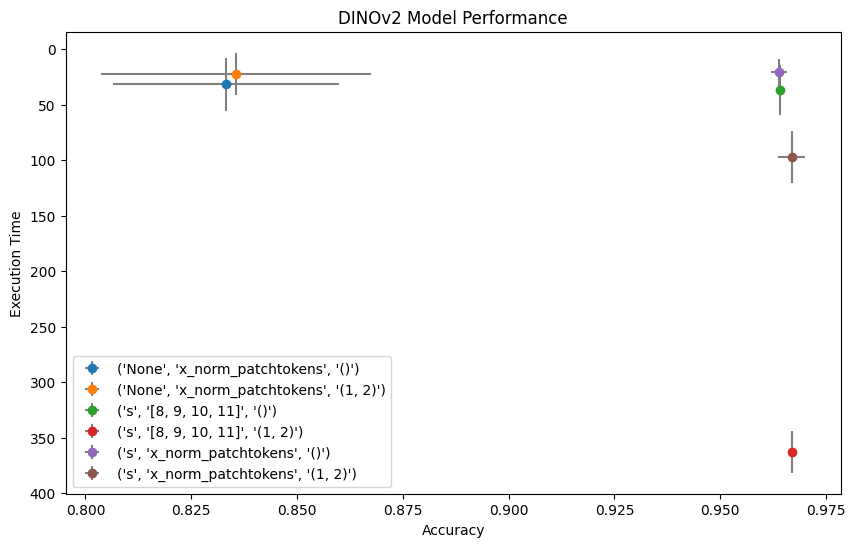

In [5]:
# Group the data by DINOv2 Model, DINOv2 Layers, and DINOv2 Scales
grouped_dinov2 = test_df.groupby(["DINOv2 Model", "DINOv2 Layers", "DINOv2 Scales"])

# Plot the mean accuracy and execution time for each group
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped_dinov2:
    accuracy = group["Accuracy"].mean()
    execution_time = group["Execution Time"].mean()
    accuracy_var = group["Accuracy"].var()
    execution_time_var = group["Execution Time"].var()
    ax.errorbar(accuracy, execution_time, xerr=np.sqrt(accuracy_var), yerr=np.sqrt(execution_time_var), fmt='o', label=name, ecolor='grey')

# Set the labels and title
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("DINOv2 Model Performance")

# Add a legend
ax.legend()

# Show the plot
plt.show()

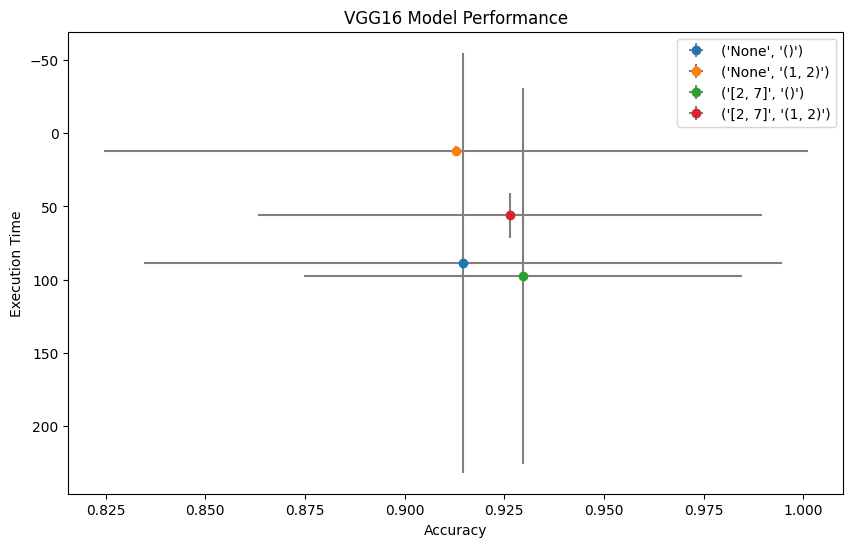

In [6]:
# Group the data by VGG16 Layers, and VGG16 Scales
grouped_vgg = test_df.groupby(["VGG16 Layers", "VGG16 Scales"])

# Plot the mean accuracy and execution time for each group
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped_vgg:
    accuracy = group["Accuracy"].mean()
    execution_time = group["Execution Time"].mean()
    accuracy_var = group["Accuracy"].var()
    execution_time_var = group["Execution Time"].var()
    ax.errorbar(accuracy, execution_time, xerr=np.sqrt(accuracy_var), yerr=np.sqrt(execution_time_var), fmt='o', label=name, ecolor='grey')

# Set the labels and title
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("VGG16 Model Performance")

# Add a legend
ax.legend()

# Show the plot
plt.show()